In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv

--2020-11-15 21:42:56--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61896 (60K) [text/plain]
Saving to: ‘sbux.csv.6’

sbux.csv.6          100%[===================>]  60.45K  --.-KB/s    in 0.004s  

2020-11-15 21:42:57 (16.1 MB/s) - ‘sbux.csv.6’ saved [61896/61896]



In [4]:
df = pd.read_csv('sbux.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
print(df.head(),'\n')
print(df.tail())

         date    open    high     low   close   volume  Name
0  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX
1  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX
2  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX
3  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX
4  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX 

            date    open   high    low  close    volume  Name
1254  2018-02-01  56.280  56.42  55.89  56.00  14690146  SBUX
1255  2018-02-02  55.900  56.32  55.70  55.77  15358909  SBUX
1256  2018-02-05  55.530  56.26  54.57  54.69  16059955  SBUX
1257  2018-02-06  53.685  56.06  53.56  55.61  17415065  SBUX
1258  2018-02-07  55.080  55.43  54.44  54.46  13927022  SBUX


In [7]:
df.shape

(1259, 7)

In [8]:
# Convert into numpy array
Data=df.to_numpy()
print(Data.shape)

(1259, 7)


In [9]:
type(Data)

numpy.ndarray

In [10]:
# To predict column 4 (closing price). Specifying column gives a vector of size (1259,)
Closing_price = Data[:, 4].reshape(-1, 1)
Closing_price.shape

(1259, 1)

In [11]:
# Print to visualize
Closing_price

array([[28.185],
       [28.07],
       [28.13],
       ...,
       [54.69],
       [55.61],
       [54.46]], dtype=object)

In [12]:
# Data standardization
scalar = StandardScaler()
Closing_price = scalar.fit_transform(Closing_price)

In [13]:
# Print to visualize
Closing_price

array([[-1.94144714],
       [-1.95251788],
       [-1.94674184],
       ...,
       [ 0.61011874],
       [ 0.6986847 ],
       [ 0.58797726]])

In [14]:
# Train, test split. Again specifying a column: train, test = Closing_price[:index, 0], Closing_price[index:, 0] would have given a vector of size
# (843,) & (416,)
index = int(0.67*len(Closing_price))
train, test = Closing_price[:index], Closing_price[index:]
print(train.shape)
print(test.shape)

(843, 1)
(416, 1)


In [15]:
# Create a new dataset
def create_dataset(dataset, T):
  X, Y = [], []
  for t in range(len(dataset) - T):
    x = dataset[t:(t+T)]
    y = dataset[t+T, 0]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

In [16]:
# Remember input data X have to be NxTxD
# Remember targets have to be a vector
T = 10
X_train, y_train = create_dataset(train, T)
X_test, y_test = create_dataset(test, T)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(833, 10, 1) (833,)
(406, 10, 1) (406,)


In [17]:
M = 20
K = 1
visible = Input(shape=(T, 1))
hidden = LSTM(M)(visible)
output = Dense(K)(hidden)

model = Model(inputs=visible, outputs=output)

In [18]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


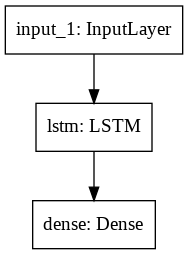

In [19]:
# plot graph
plot_model(model, to_file='recurrent_neural_network.png')

In [20]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam'
)

In [21]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)           # default batch size = 32. 
                                                                                         # 833/32 = ~27

Epoch 1/10
27/27 [==============================] - 1s 20ms/step - loss: 0.4415 - val_loss: 0.2478
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0979 - val_loss: 0.0554
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.0298
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0261 - val_loss: 0.0293
Epoch 5/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.0273
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.0245
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0220
Epoch 8/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0144 - val_loss: 0.0208
Epoch 9/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.0190
Epoch 10/10
27/27 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0175


In [22]:
r.history.keys()

dict_keys(['loss', 'val_loss'])

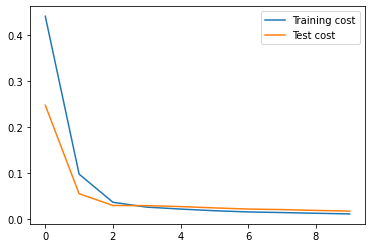

In [23]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()

In [24]:
# Multi step forecast
prediction = []

x = X_test[0]
print(x.shape)
# print(x)
# [[0.67365519]
#  [0.69098331]
#  [0.6698045 ]
#  [0.67654321]
#  [0.71793817]
#  [0.6986847 ]
#  [0.74874372]
#  [0.60915607]
#  [0.5138514 ]
#  [0.62552152]]

# x = np.roll(x, -1)
# print(x)
# [[0.69098331]
#  [0.6698045 ]
#  [0.67654321]
#  [0.71793817]
#  [0.6986847 ]
#  [0.74874372]
#  [0.60915607]
#  [0.5138514 ]
#  [0.62552152]
#  [0.67365519]]

# x[-1] = 0.0
# print(x)
# [[0.69098331]
#  [0.6698045 ]
#  [0.67654321]
#  [0.71793817]
#  [0.6986847 ]
#  [0.74874372]
#  [0.60915607]
#  [0.5138514 ]
#  [0.62552152]
#  [0.        ]]

while len(prediction) < len(y_test):
  p = model.predict(x.reshape(1, -1, 1))[0, 0]
  prediction.append(p)

  x = np.roll(x, -1)
  x[-1] = p

(10, 1)


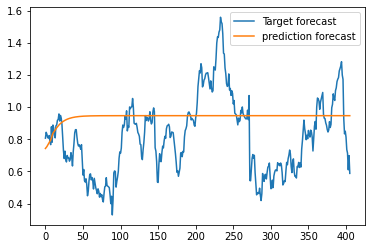

In [25]:
# Model is not making the prediction in time series. Only copying the previous value.
plt.plot(y_test, label='Target forecast')
plt.plot(prediction, label='prediction forecast')
plt.legend()

**To forecast based on whether the price goes up or down (return is positive or negative)**

In [26]:
# Printing first 5 rows and all columns for visualization
print(Data[:5])

[['2013-02-08' 27.92 28.325 27.92 28.185 7146296 'SBUX']
 ['2013-02-11' 28.26 28.26 27.93 28.07 5457354 'SBUX']
 ['2013-02-12' 28.0 28.275 27.975 28.13 8665592 'SBUX']
 ['2013-02-13' 28.23 28.23 27.75 27.915 7022056 'SBUX']
 ['2013-02-14' 27.765 27.905 27.675 27.775 8899188 'SBUX']]


In [27]:
# We need to delete the column 0 & column 6 as its not required. 0=row, 1=column
Data = np.delete(Data, [0, 6], 1)
print(Data[:5])

[[27.92 28.325 27.92 28.185 7146296]
 [28.26 28.26 27.93 28.07 5457354]
 [28.0 28.275 27.975 28.13 8665592]
 [28.23 28.23 27.75 27.915 7022056]
 [27.765 27.905 27.675 27.775 8899188]]


In [28]:
# Calculate return
# Return is (close price - previous close price) / (previous close price)
# We need to first calculate previous close price
# First we insert a column of 0's. It will be the 5th column. 0=row, 1=column

New_data = np.insert(Data, 5, 0.0, 1)
print(New_data[:5])

[[27.92 28.325 27.92 28.185 7146296 0.0]
 [28.26 28.26 27.93 28.07 5457354 0.0]
 [28.0 28.275 27.975 28.13 8665592 0.0]
 [28.23 28.23 27.75 27.915 7022056 0.0]
 [27.765 27.905 27.675 27.775 8899188 0.0]]


In [29]:
# Now lets add previous closing price in place of the column of 0's. The code below selects column 3 (closing price), rolls it 1 poistion & then adds in
# place of the 5th column

New_data[:, 5] = np.roll(New_data[:, 3], 1)
print(New_data[:5])

[[27.92 28.325 27.92 28.185 7146296 54.46]
 [28.26 28.26 27.93 28.07 5457354 28.185]
 [28.0 28.275 27.975 28.13 8665592 28.07]
 [28.23 28.23 27.75 27.915 7022056 28.13]
 [27.765 27.905 27.675 27.775 8899188 27.915]]


In [30]:
# To calculate return which we will use for as binary classification

New_data[:, 5] = (New_data[:, 3] - New_data[:, 5]) / New_data[:, 5]
print(New_data[:5], '\n')
print(New_data.shape)

[[27.92 28.325 27.92 28.185 7146296 -0.48246419390378265]
 [28.26 28.26 27.93 28.07 5457354 -0.004080184495298862]
 [28.0 28.275 27.975 28.13 8665592 0.002137513359458451]
 [28.23 28.23 27.75 27.915 7022056 -0.007643085673658011]
 [27.765 27.905 27.675 27.775 8899188 -0.0050152247895396945]] 

(1259, 6)


In [31]:
# Data standardization on all columns
scalar = StandardScaler()
X = scalar.fit_transform(New_data)
print(X[:5], '\n')
print(X.shape)

[[ -1.96671476  -1.95059955  -1.94532508  -1.94144714  -0.47579856
  -26.26411502]
 [ -1.93397518  -1.95681707  -1.94435421  -1.95251788  -0.86136052
   -0.23379797]
 [ -1.95901133  -1.95538225  -1.93998527  -1.94674184  -0.12896443
    0.10452572]
 [ -1.93686396  -1.95968669  -1.96182996  -1.96743932  -0.50416083
   -0.42766617]
 [ -1.98164016  -1.99077429  -1.96911152  -1.98091675  -0.07563771
   -0.28467634]] 

(1259, 6)


In [32]:
# Test, train split

index = int(0.67*len(X))
train, test = X[:index], X[index:]
print(train.shape)
print(test.shape)

(843, 6)
(416, 6)


In [33]:
# Create a new dataset
def create_dataset(dataset, T):
  X, Y = [], []
  for t in range(len(dataset) - T):
    x = dataset[t:(t+T), :5]
    y = dataset[t+T, 5] > 0
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

In [34]:
# Remember input data X have to be NxTxD
# Remember targets have to be a vector
T = 10
X_train, y_train = create_dataset(train, T)
X_test, y_test = create_dataset(test, T)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(833, 10, 5) (833,)
(406, 10, 5) (406,)


In [35]:
M = 20
K = 1
visible = Input(shape=(T, 5))
hidden = LSTM(M)(visible)
output = Dense(K, activation='sigmoid')(hidden)

model = Model(inputs=visible, outputs=output)

In [36]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 5)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [38]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50)           # default batch size = 32. 
                                                                                         # 833/32 = ~27

Epoch 1/50
27/27 [==============================] - 1s 25ms/step - loss: 0.7033 - accuracy: 0.4862 - val_loss: 0.6951 - val_accuracy: 0.4828
Epoch 2/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5102 - val_loss: 0.6969 - val_accuracy: 0.4828
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5162 - val_loss: 0.6986 - val_accuracy: 0.4828
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.5222 - val_loss: 0.6946 - val_accuracy: 0.4828
Epoch 5/50
27/27 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5234 - val_loss: 0.6945 - val_accuracy: 0.4828
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5054 - val_loss: 0.6919 - val_accuracy: 0.5567
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5186 - val_loss: 0.6922 - val_accuracy: 0.5369
Epoch 8/50
27/27 [=

In [39]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

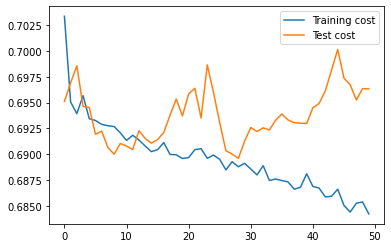

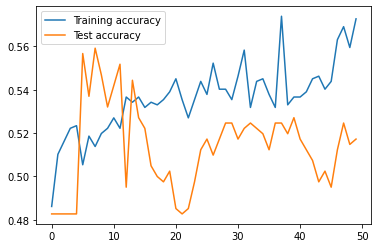

In [40]:
# Clearly shows we cannot predict if the return will increase or decrease
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.show()